<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_14_NN_Gas_Turbines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import numpy
import pandas as pd

In [104]:
gas=pd.read_csv("gas_turbines.csv")
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [105]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [106]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [107]:
gas.shape

(15039, 11)

In [108]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [109]:
gas.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [110]:
X = gas.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
Y = gas.loc[:,['TEY']]

In [111]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [112]:
Y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


build the model

In [113]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled,Y, test_size=0.3, random_state = 0)

In [115]:
model=Sequential()
model.add(Dense(10,input_dim=10,kernel_initializer='uniform',activation='relu'))
model.add(Dense(4,kernel_initializer='uniform',activation='relu'))
model.add(Dense(4,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [116]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 4)                 44        
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [118]:
history=model.fit(np.array(X_train),np.array(y_train),validation_split=0.20,epochs=100,batch_size=10)

Epoch 1/100
843/843 [==============================] - 2s 2ms/step - loss: -13636.7139 - accuracy: 0.0000e+00 - val_loss: -68602.5547 - val_accuracy: 0.0000e+00
Epoch 2/100
843/843 [==============================] - 1s 1ms/step - loss: -390158.1875 - accuracy: 0.0000e+00 - val_loss: -939234.1875 - val_accuracy: 0.0000e+00
Epoch 3/100
843/843 [==============================] - 1s 2ms/step - loss: -2202623.7500 - accuracy: 0.0000e+00 - val_loss: -3859246.5000 - val_accuracy: 0.0000e+00
Epoch 4/100
843/843 [==============================] - 1s 1ms/step - loss: -6720723.0000 - accuracy: 0.0000e+00 - val_loss: -10052963.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
843/843 [==============================] - 1s 1ms/step - loss: -15165301.0000 - accuracy: 0.0000e+00 - val_loss: -20704768.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
843/843 [==============================] - 1s 1ms/step - loss: -28713884.0000 - accuracy: 0.0000e+00 - val_loss: -36980452.0000 - val_accuracy: 0.0000e+00
Epoch 7/100

In [119]:
scores=model.evaluate(X_test,y_test)
print("%s: %0.2f%%" %(model.metrics_names[1],scores[1]*100))

141/141 [==============================] - 0s 1ms/step - loss: -452516184064.0000 - accuracy: 0.0000e+00
accuracy: 0.00%


Build another model

In [120]:
model1 = Sequential()
model1.add(Dense(10, input_dim=10, activation='relu'))
model1.add(Dense(4, kernel_initializer='uniform', activation='relu'))
model1.add(Dense(1, kernel_initializer='uniform', activation='linear'))

In [121]:
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [122]:
history2=model1.fit(np.array(X_train),np.array(y_train),validation_split=0.3, epochs=100, batch_size=12)

Epoch 1/100
614/614 [==============================] - 1s 2ms/step - loss: 14383.1914 - mse: 14383.1904 - val_loss: 6258.6099 - val_mse: 6258.6099
Epoch 2/100
614/614 [==============================] - 1s 1ms/step - loss: 2632.2324 - mse: 2632.2324 - val_loss: 1102.5624 - val_mse: 1102.5624
Epoch 3/100
614/614 [==============================] - 1s 2ms/step - loss: 691.2348 - mse: 691.2348 - val_loss: 418.5833 - val_mse: 418.5833
Epoch 4/100
614/614 [==============================] - 1s 2ms/step - loss: 317.2402 - mse: 317.2402 - val_loss: 233.3422 - val_mse: 233.3422
Epoch 5/100
614/614 [==============================] - 1s 1ms/step - loss: 188.2082 - mse: 188.2082 - val_loss: 147.6162 - val_mse: 147.6162
Epoch 6/100
614/614 [==============================] - 1s 2ms/step - loss: 120.7789 - mse: 120.7789 - val_loss: 98.1586 - val_mse: 98.1586
Epoch 7/100
614/614 [==============================] - 1s 2ms/step - loss: 82.8630 - mse: 82.8630 - val_loss: 69.5887 - val_mse: 69.5887
Epoch 8/1

In [123]:
scores = model1.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

141/141 [==============================] - 0s 1ms/step - loss: 0.5253 - mse: 0.5253
mse: 52.53%


In [124]:
history2.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

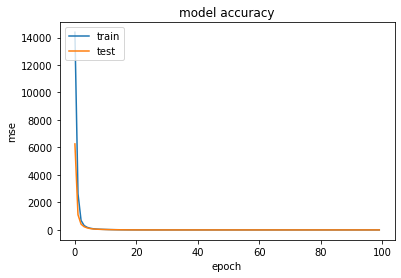

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history2.history['mse'])
plt.plot(history2.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
